# Fictive Temperature Analysis
## An example of using the `fictive_temp_functions` code

> To Do: 
> * Make it a package
> * Convert to Cp
> * Add enthalpy calculation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# fix this eventually
import sys
sys.path.insert(0, "../codebase")

from analysis_summary import summarize_flash_data
from data_parser import parse_mettler_dsc_txt_file, extract_T_and_dsc
from fictive_temp_functions import baseline_correction, fictive_temperature
from data_saver import write_single_csv
from utils import subtract_background

In [2]:
path = "../Data/tests/PET_aging_test_2.txt"

# parse results from raw file
results = parse_mettler_dsc_txt_file(path)

### Data Requirements: 

The `baseline_correction` and `fictive_temperature` functions expect individual sample data to come in the form of a dictionary containing only temperature and heat-flow data as numpy arrays, keyed by `T` and `dsc`, respectively.

In [3]:
# get only necessary data for analysis
data = extract_T_and_dsc(results)

# define sample and refernce data
sample = data[81]
ref = data[5]

## Using the `baseline_correction` function

> To do: describe how it works

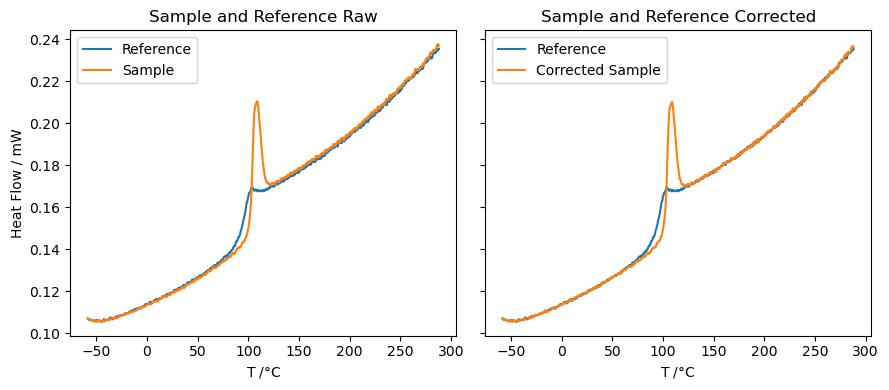

In [4]:
# define temp range for glass and liquid lines, respectively
T1, T2 = (-10, 50), (150, 200)

# compute baseline-corrected curve and save
dsc_corrected = baseline_correction(sample, ref, T1, T2)

sample_corrected = sample.copy()
sample_corrected["dsc"] = dsc_corrected

# plot raw and corrected curves
fig, axs = plt.subplots(1, 2, figsize=(9, 4), sharey=True)
ax1, ax2 = axs
for ax in axs:
    ax.plot(ref["T"], ref["dsc"], label="Reference")
    ax.set_xlabel("T /$\degree$C")

ax1.plot(sample["T"], sample["dsc"], label="Sample")
ax1.set_title("Sample and Reference Raw")
ax1.set_ylabel("Heat Flow / mW")

ax2.plot(sample_corrected["T"], sample_corrected["dsc"], label="Corrected Sample")
ax2.set_title("Sample and Reference Corrected")

fig.tight_layout()
for ax in axs:
    ax.legend()
plt.show()

## Using the `fictive_temperature` function

> To do: describe how it works

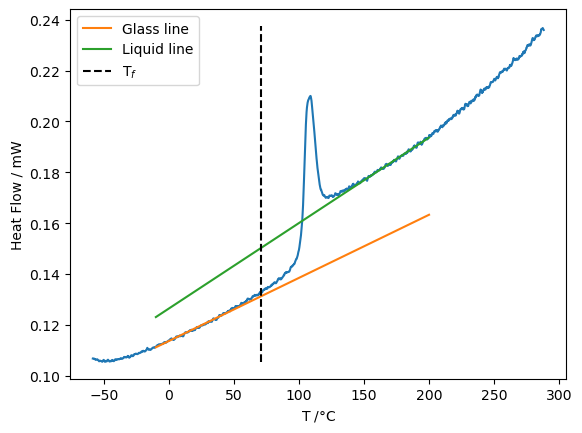

In [5]:
# compute and plot fictive temperature data
Tf_results = fictive_temperature(sample_corrected, T1, T2)

plt.plot(sample_corrected["T"], sample_corrected["dsc"])

T_slice = Tf_results["T_slice"]

plt.plot(T_slice, Tf_results["glass_line"], label="Glass line")
plt.plot(T_slice, Tf_results["liquid_line"], label="Liquid line")
plt.vlines(Tf_results["Tf"], min(sample["dsc"]), max(sample["dsc"]), color="k", linestyles="--", label="T$_f$")
plt.xlabel("T /$\degree$C")
plt.ylabel("Heat Flow / mW")
plt.legend()
plt.show()

The fictive temperature function also returns other data from the analysis. Useful for debugging.

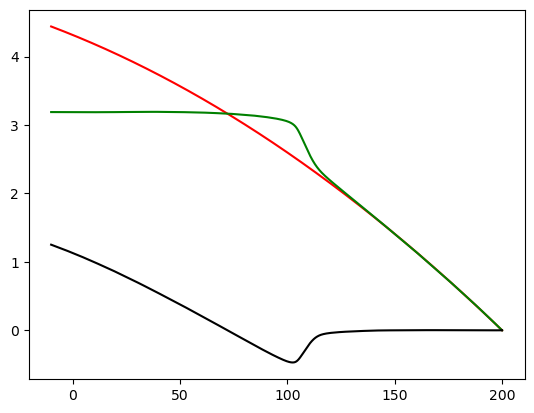

In [6]:
plt.plot(Tf_results["T_slice"], Tf_results["area_liq_minus_glass"], color="red")
plt.plot(Tf_results["T_slice"], Tf_results["area_exp_minus_glass"], color="green")
plt.plot(Tf_results["T_slice"], Tf_results["area_liq_minus_glass"]-Tf_results["area_exp_minus_glass"], color="k")

## Example: Analysis of many curves
we will start by correcting all curves in place

In [8]:
plt.figure()
for curve in data.values():
    dsc_corrected = baseline_correction(curve, ref, T1, T2)
    curve["dsc"] = dsc_corrected
    plt.plot(curve["T"], curve["dsc"])
plt.xlabel("T /$\degree$C")
plt.ylabel("Heat Flow / mW")
plt.show()

IndexError: boolean index did not match indexed array along axis 0; size of axis is 3470 but size of corresponding boolean axis is 3469

<Figure size 640x480 with 0 Axes>

In the absence of a robust, automated way to choose T1 and T2 (it´s on the to do list) I will define global ranges than can apply to all data.

In [ ]:
T1, T2 = (-10, 50), (150, 200)

plt.figure()
for i, key in enumerate(data):
    Tf_results = fictive_temperature(data[key], T1, T2)
    plt.scatter(i, Tf_results["Tf"])
    data[key]["Tf"] = Tf_results["Tf"]

In [ ]:
data_tf = data.copy()
for curve in data_tf.values():
    curve.pop("T")
    curve.pop("dsc")

In [ ]:
data_tf

In [ ]:
write_single_csv(data, "test.csv", include_tf=True)